In [137]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import cm
import math
import librosa
import soundfile as sf
import os
from scipy.fftpack import fft
from scipy.fftpack import ifft
from scipy import stats
import wave, sys
from math import e
import ctypes

In [138]:
##########################2.2A
d = 0.04
N = 7
fs = 48000
theta = np.pi/4 #45 degrees in radians
c = 340 # speed of sound in m/s
tn = []

#We read each audio file and putting it to variables
#We did not choose to save the signals in a list 
#because it was making our exercise implementation more complicating
audio0 = librosa.load("sensor_0.wav", fs)[0]
audio1 = librosa.load("sensor_1.wav", fs)[0]
audio2 = librosa.load("sensor_2.wav", fs)[0]
audio3 = librosa.load("sensor_3.wav", fs)[0]
audio4 = librosa.load("sensor_4.wav", fs)[0]
audio5 = librosa.load("sensor_5.wav", fs)[0]
audio6 = librosa.load("sensor_6.wav", fs)[0]
audio7 = librosa.load("source.wav", fs)[0]

length = len(audio7)

t = np.linspace(0, length / fs, length)
w = np.linspace(0,2*np.pi, length)

for n in range(7):
    tn.append(-(n-3) * d * np.cos(theta)/c)
    
gg = np.exp(-1j * w, dtype = complex)

hds = (1/N)*(np.array([gg ** tn[0], gg ** tn[1], gg ** tn[2], gg ** tn[3], gg ** tn[4], gg ** tn[5], gg ** tn[6]]))

#Implementing the time-shift operation for each fft-ed signal
dft_audio0 = np.multiply(np.fft.fft(audio0, length), np.exp(tn[0] * w * fs * 1j, dtype=complex))
dft_audio1 = np.multiply(np.fft.fft(audio1, length), np.exp(tn[1] * w * fs * 1j, dtype=complex))
dft_audio2 = np.multiply(np.fft.fft(audio2, length), np.exp(tn[2] * w * fs * 1j, dtype=complex))
dft_audio4 = np.multiply(np.fft.fft(audio4, length), np.exp(tn[4] * w * fs * 1j, dtype=complex))
dft_audio5 = np.multiply(np.fft.fft(audio5, length), np.exp(tn[5] * w * fs * 1j, dtype=complex))
dft_audio6 = np.multiply(np.fft.fft(audio6, length), np.exp(tn[6] * w * fs * 1j, dtype=complex))

#Inversing the results from the previous operation
inverse_dft_audio0 = (np.fft.ifft(dft_audio0))
inverse_dft_audio1 = (np.fft.ifft(dft_audio1))
inverse_dft_audio2 = (np.fft.ifft(dft_audio2))
inverse_dft_audio4 = (np.fft.ifft(dft_audio4))
inverse_dft_audio5 = (np.fft.ifft(dft_audio5))
inverse_dft_audio6 = (np.fft.ifft(dft_audio6))

#Taking the real part from the sum of the previous results plus the signal from the middle microphone
exit = np.real(audio3 + inverse_dft_audio0 + inverse_dft_audio1 + inverse_dft_audio2 + inverse_dft_audio4 + inverse_dft_audio5 + inverse_dft_audio6)/N

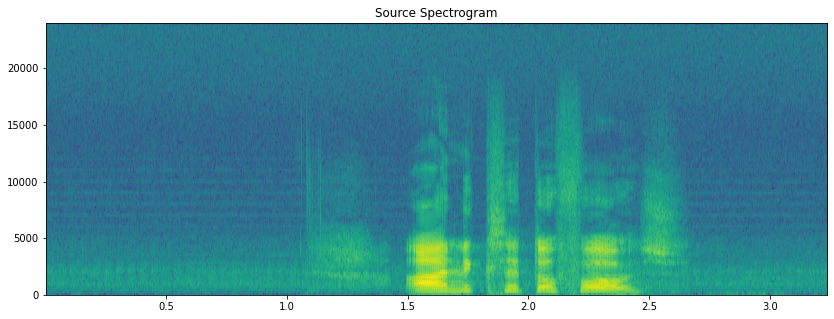

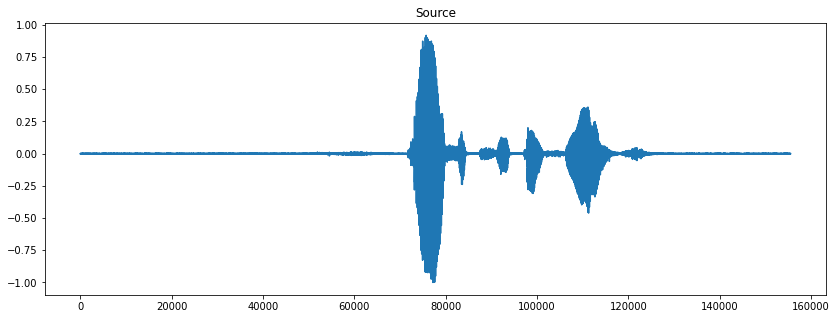

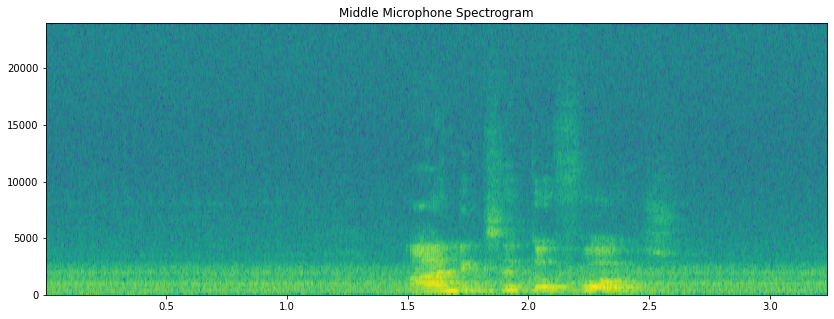

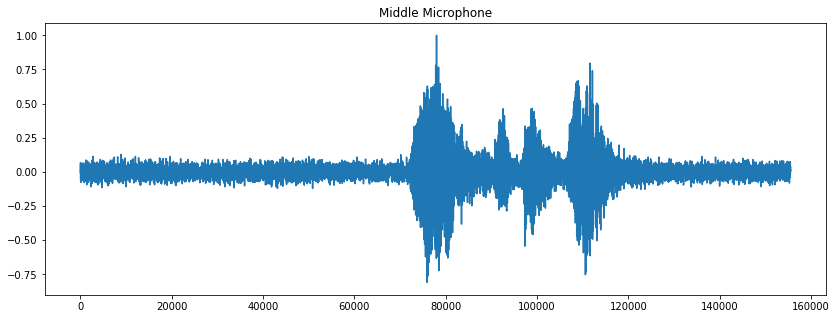

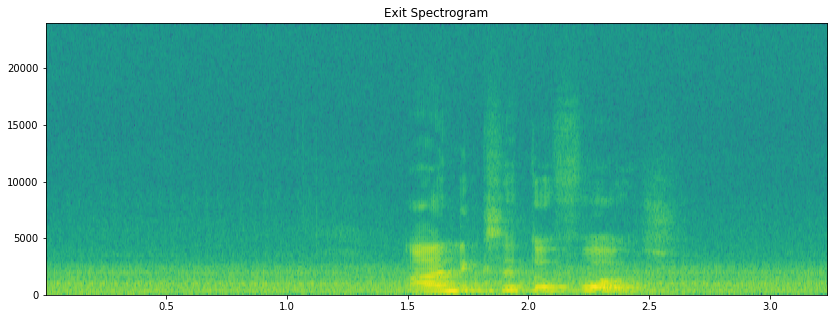

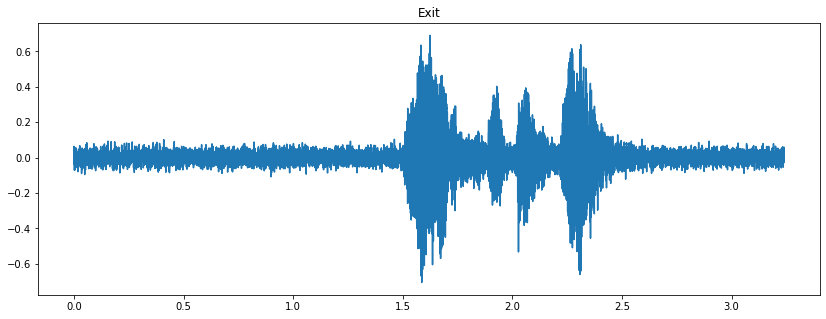

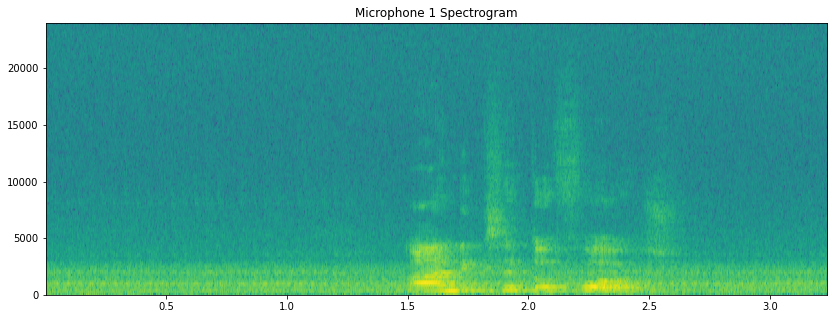

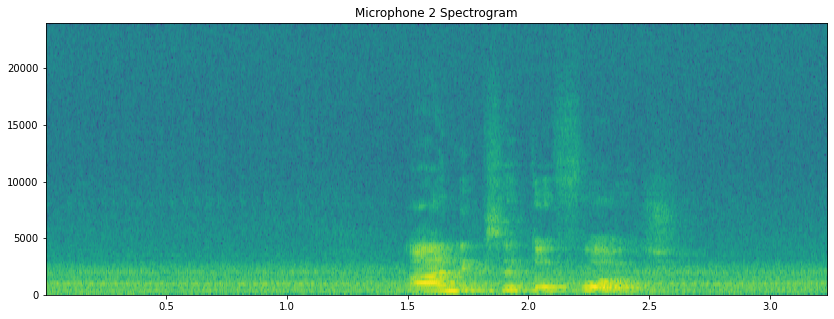

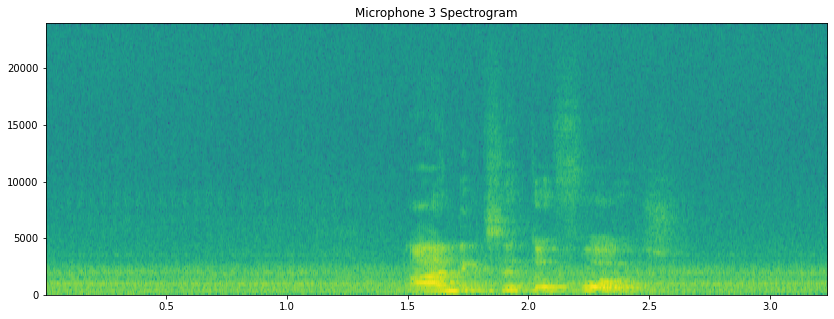

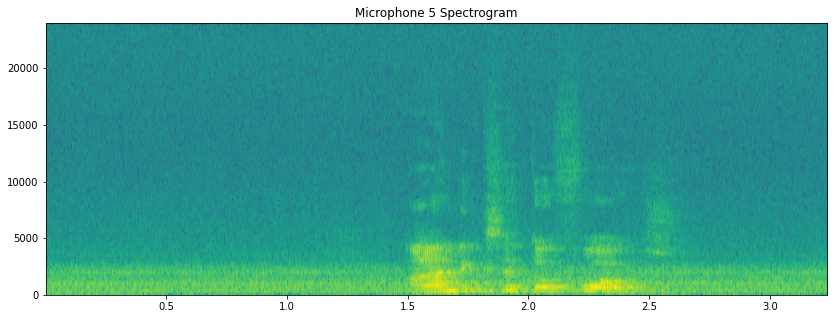

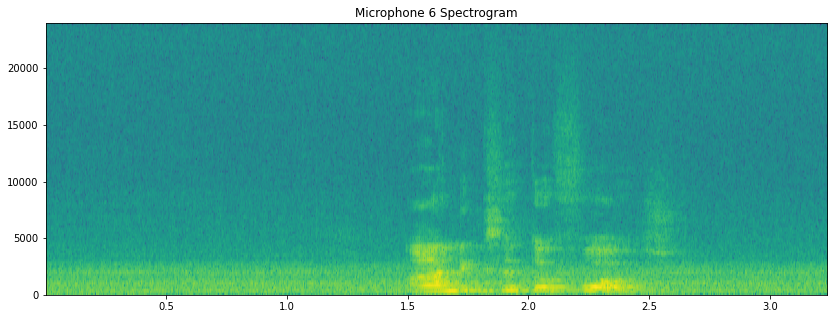

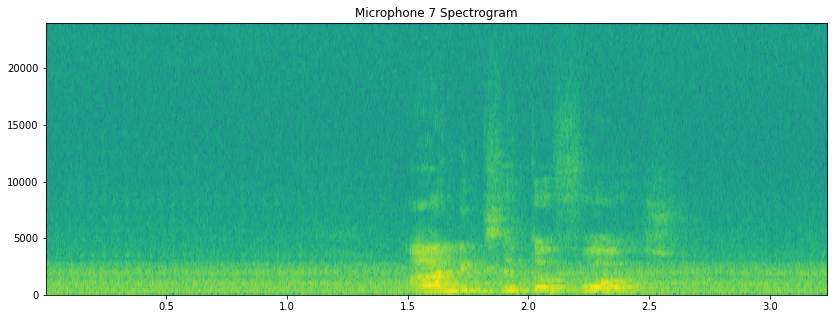

In [139]:
#Presenting the results of 2.2A - 1 and 2
plt.figure(figsize = (14, 5))
plt.title('Source Spectrogram')
Pxx, freqs, bins, im = plt.specgram(audio7, Fs = fs)

plt.figure(figsize = (14, 5))
plt.title('Source')
plt.plot(audio7)

plt.figure(figsize = (14, 5))
plt.title('Middle Microphone Spectrogram')
Pxx, freqs, bins, im = plt.specgram(audio3, Fs = fs)

plt.figure(figsize = (14, 5))
plt.title('Middle Microphone')
plt.plot(audio3)

plt.figure(figsize = (14, 5))
plt.title('Exit Spectrogram')
Pxx, freqs, bins, im = plt.specgram(exit, Fs = fs)

plt.figure(figsize = (14, 5))
plt.title('Exit')
plt.plot(t, exit)

#create a audio file for the beamforming exit
sf.write('real_ds.wav', exit, fs)

#Creating the spectogram for every other microphone (OPTIONAL)
plt.figure(figsize = (14, 5))
plt.title('Microphone 1 Spectrogram')
Pxx, freqs, bins, im = plt.specgram(audio0, Fs = fs)
plt.figure(figsize = (14, 5))
plt.title('Microphone 2 Spectrogram')
Pxx, freqs, bins, im = plt.specgram(audio1, Fs = fs)
plt.figure(figsize = (14, 5))
plt.title('Microphone 3 Spectrogram')
Pxx, freqs, bins, im = plt.specgram(audio2, Fs = fs)
plt.figure(figsize = (14, 5))
plt.title('Microphone 5 Spectrogram')
Pxx, freqs, bins, im = plt.specgram(audio4, Fs = fs)
plt.figure(figsize = (14, 5))
plt.title('Microphone 6 Spectrogram')
Pxx, freqs, bins, im = plt.specgram(audio5, Fs = fs)
plt.figure(figsize = (14, 5))
plt.title('Microphone 7 Spectrogram')
Pxx, freqs, bins, im = plt.specgram(audio6, Fs = fs)

In [140]:
#SSNR Calculation for middle microphone
def ssnr_calc(noise, title):
    samples = fs * (0.50 - 0.47)
    arithmos_plaisiou = int(length/samples)
    pl_start = int((samples * arithmos_plaisiou) + 1)
    pl_end = int((arithmos_plaisiou + 1) * samples)

    sum_snr = 0
    plithos = 0

    for i in range(arithmos_plaisiou):
        frame = source[int(i*samples+1):int((i+1)*samples)]
        frame_snr = 10 * np.log10(sum(frame ** 2) / sum(noise ** 2))
        if frame_snr > 35:
            frame_snr = 35
        elif frame_snr > 0:
            sum_snr += frame_snr
            plithos += 1
    ssnr = (1/plithos) * sum_snr
    print('SSNR of ' + str(title) + ' is: ' + str(ssnr))

source = audio7
noise_middle = audio3[1441:2880]
noise_beamformer = exit[1441:2880]

ssnr_calc(noise_middle, 'Central Microphone')
ssnr_calc(noise_beamformer, 'Beamformer Result')


SSNR of Central Microphone is: 8.146842586237858
SSNR of Beamformer Result is: 9.311716843561113
